<a href="https://colab.research.google.com/github/vunky-himawan/PCVK/blob/main/week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. Dilasi tanpa Library



In [ ]:
def dilasi_citra(F, w):
  #size image
  p, q = F.shape

  imgD = np.zeros((p,q), dtype=np.uint8)

  # Generate structure element dilasi (SED)
  SED = np.ones((w,w), dtype=np.uint8)
  constant1 = (w-1) // 2

  # Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp * SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 20, 50, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

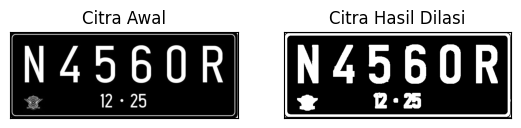

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 2. Dilasi SED

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg')
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations=2)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


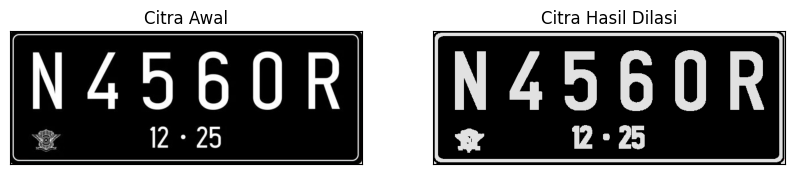

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# 3. Erosi Tanpa Library

In [ ]:
def erosi_citra(F, k):
  # size image
  m, n = F.shape

  SE = np.ones((k, k), dtype=np.uint8)
  constant=(k-1) // 2

  imgE = np.zeros((m, n), dtype=np.uint8)

  # Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i-constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i, j] = np.min(product)

  return imgE

In [ ]:
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 252, 500, cv2.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

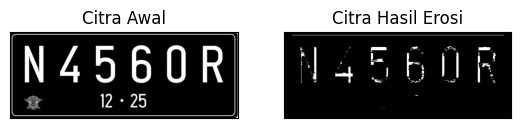

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 4. Dilasi Structuring Element Erosi (SE)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg')

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=2)

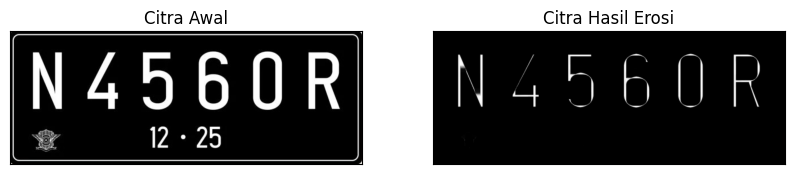

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

# 5. Operasi Opening Tanpa Library

In [ ]:
img_o = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)

reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho, k), k)

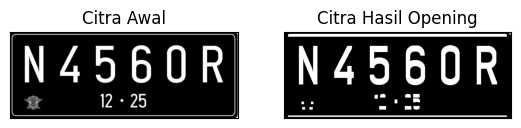

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

# 6. Opening Menggunakan Library

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg')
ret, thres = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

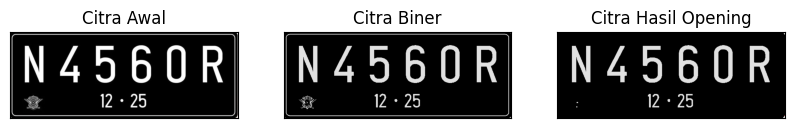

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

# 7. Operasi Closing tanpa Library

In [ ]:
img_c = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc, k), k)

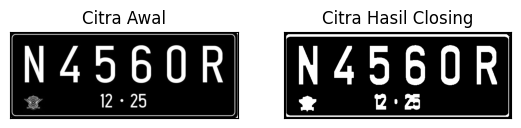

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_c, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgC, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# 8. Operasi Closing Dengan Library

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg')
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

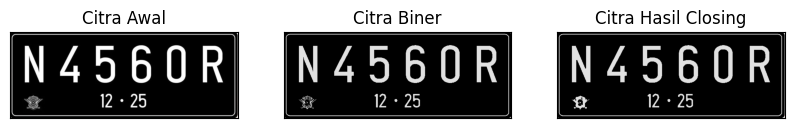

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# 10. Operasi Dilasi dengan Structuring Element 3x3

In [ ]:
# Dilasi Cross SED

def dilasi_citra(F, w):
  p, q = F.shape

  imgD = np.zeros((p,q), dtype=np.uint8)
  # Generate structure element dilasi (SED)
  # SED = np.zeros((w,w), dtype=np.uint8)

  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0,1,0]], dtype=np.uint8)
  constant1 = (w-1) // 2

  # Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp * SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
print('SED = Cross 3')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

SED = Cross 3


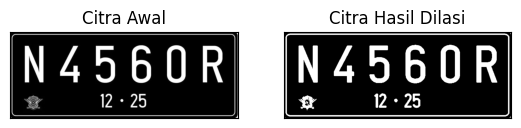

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# 11. Operasi Dilasi dengan Structuring Element 5x5

In [ ]:
def dilasi_citra(F, w):
  #size image
  p, q = F.shape

  imgD = np.zeros((p, q), dtype=np.uint8)

  # Generate structure element dilasi (SED)
  # SED = np.ones((w, w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)
  constant1 = (w-1) // 2

  # Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
print('SED = Cross 5')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

SED = Cross 5


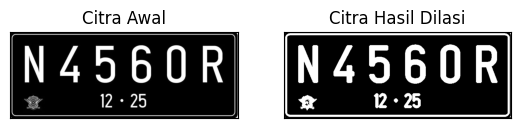

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 12. Operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3

In [ ]:
# Dilasi Circular SED

def dilasi_citra(F, w):
  #size image
  p, q = F.shape

  imgD = np.zeros((p, q), dtype=np.uint8)

  # Generate structure element dilasi (SED)
  SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
  constant1 = (w-1) // 2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
print('SED = Circle 3')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

SED = Circle 3


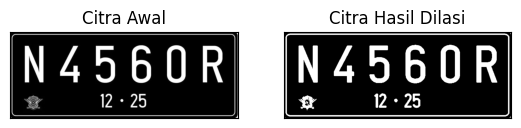

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 13. Operasi dilasi dengan Structuring Element berbentuk 5x5

In [ ]:
print('SED = Circle 5')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

SED = Circle 5


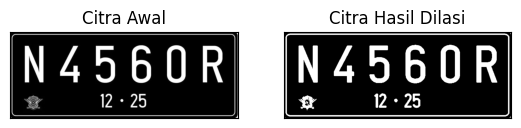

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 14. Operasi Erosi dengan Structuring ELement Berbentuk Rectangle 3x5

In [ ]:
# Erosi Cross SE

def erosi_citra(F, p, l):
  # size image
  m, n = F.shape

  SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p,l)) #SE persegi
  constant1 = (l-1) // 2
  constant2 = (p-1) // 2

  #print (SE)
  imgE = np.zeros((m, n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2, n-constant2):
      temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product = temp * SE
      imgE[i, j] = np.min(product)


  return imgE

In [ ]:
print('SE = Rectangle 3x5')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1, p, l)

SE = Rectangle 3x5


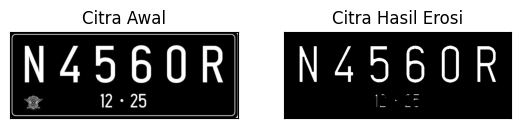

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 15. Operasi Erosi dengan Structuring ELement Berbentuk Rectangle 5x7

In [ ]:
print('SE = Rectangle 5x7')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1, p, l)

SE = Rectangle 5x7


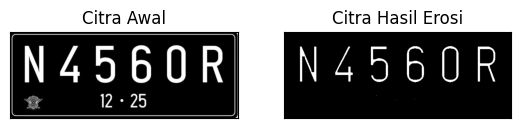

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 16. Operasi Erosi dengan Structuring ELement Berbentuk Line Vertikal 3

In [ ]:
# Erosi Line Vertikal SE

def erosi_citra(F, k):
  #size image
  m, n = F.shape

  # Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, k))
  constant = (k-1) // 2

  imgE = np.zeros((m, n), dtype=np.uint8)

  # Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i, j] = np.min(product)

  return imgE

In [ ]:
print('SE = Line Vertikal 3')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1, k)

SE = Line Vertikal 3


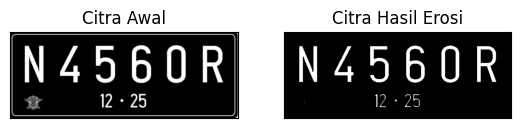

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 17. Operasi Erosi dengan Structuring ELement Berbentuk Line Vertikal 5

In [ ]:
print('SE = Line Vertikal 5')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/platnomor.jpg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1, k)

SE = Line Vertikal 5


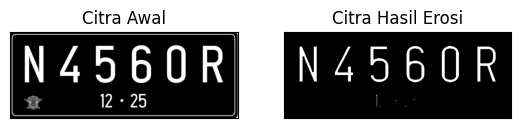

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 18. TopHat


In [ ]:
# Getting the kernel to be used in Top-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

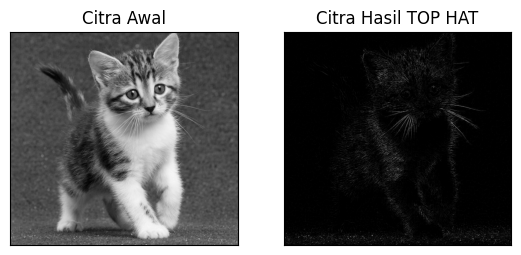

In [ ]:
#cv2_imshow('original', img)
#cv2_imshow('tophat', tophat_img)
#cv2.waitKey(5000)
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

# 19. BLACKHAT

In [ ]:
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

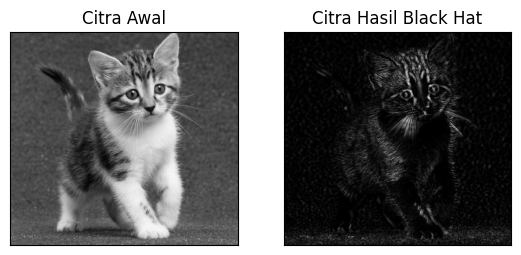

In [ ]:
#cv2_imshow('original', img)
#cv2_imshow('tophat', tophat_img)
#cv2.waitKey(5000)
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

# 20. Skeleton

In [ ]:
from skimage import filters
from skimage.morphology import skeletonize

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lily.jpg', 0)

binary = img > filters.threshold_triangle(img)

binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

skeleton = skeletonize(binary_cp)

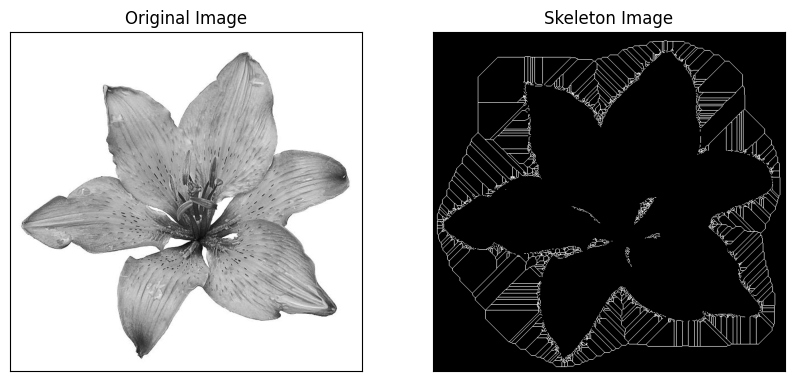

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 21. Skeleton Inverse

In [ ]:
from skimage import io

In [ ]:
img = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lily.jpg')[..., 0]

binary = img < filters.threshold_triangle(img)

skeleton = skeletonize(binary)

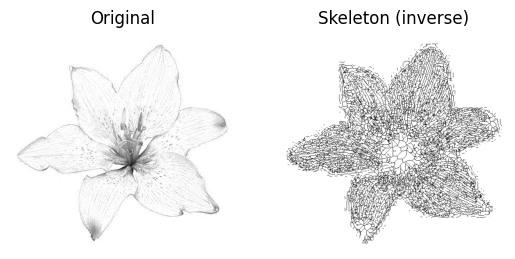

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('Skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

In [ ]:
from skimage import img_as_float, color, morphology

In [ ]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

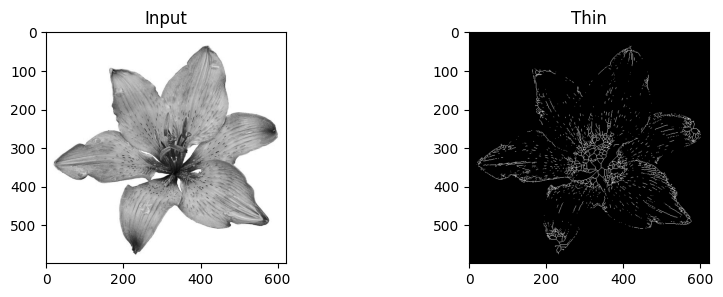

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.show()

# Tugas: Menerapkan semua informasi

# 1. Dilasi Tanpa Library

In [ ]:
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

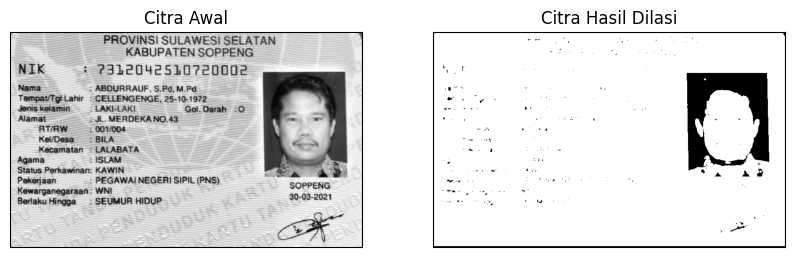

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(121), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 2. Dilasi Dengan Library

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations=2)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


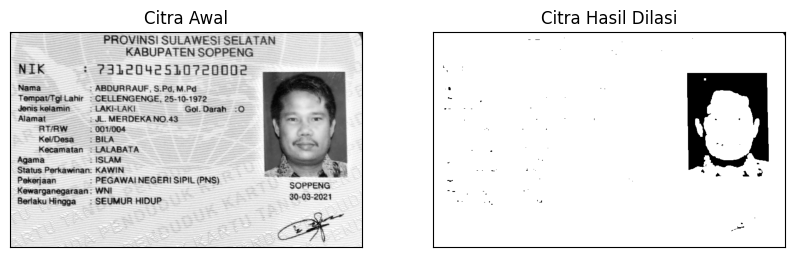

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# 3. Erosi Tanpa Library

In [ ]:
def erosi_citra(F, k):
  # size image
  m, n = F.shape

  SE = np.ones((k, k), dtype=np.uint8)
  constant=(k-1) // 2

  imgE = np.zeros((m, n), dtype=np.uint8)

  # Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i-constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i, j] = np.min(product)

  return imgE

In [ ]:
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 175, 225, cv2.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

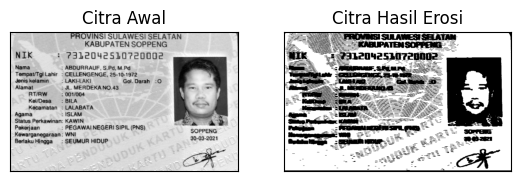

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 4. Dilasi Structuring Element Erosi (SE)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

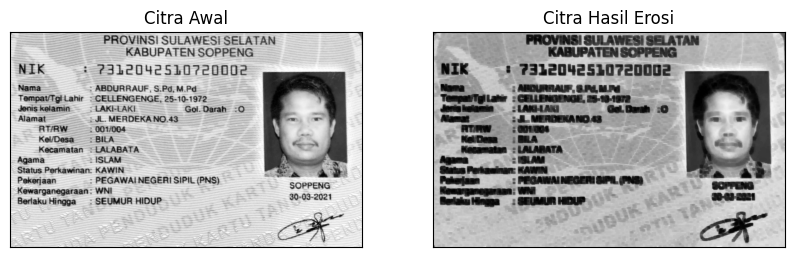

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

# 5. Operasi Opening Tanpa Library

In [ ]:
img_o = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)

reto, thresho = cv2.threshold(img_o, 127, 225, cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho, k), k)

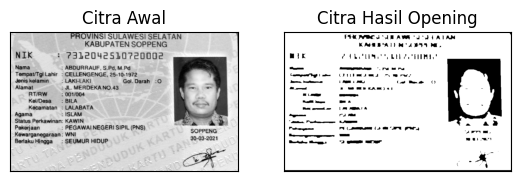

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_o, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

# 6. Opening Menggunakan Library

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thres = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
openn = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

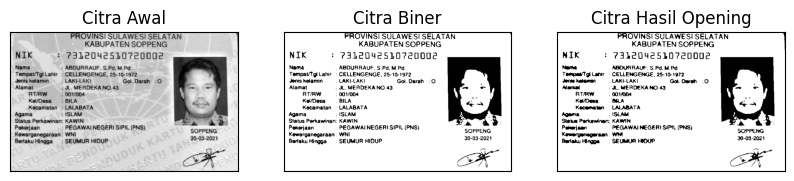

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(openn, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])

plt.show()

# 7. Operasi Closing tanpa Library

In [ ]:
img_c = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
retc, threshc = cv2.threshold(img_c, 127, 225, cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc, k), k)

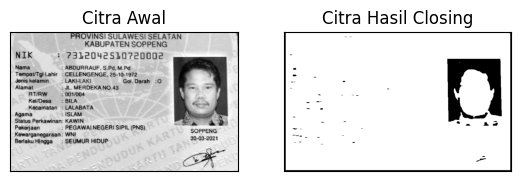

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(131), plt.imshow(img_c, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgC, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# 8. Operasi Closing Dengan Library

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3, 3), np.uint8)
closs = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

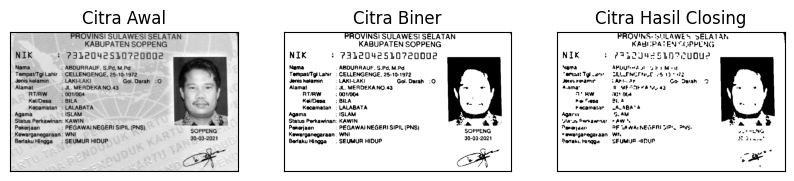

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closs, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# 10. Operasi Dilasi dengan Structuring Element 3x3

In [ ]:
# Dilasi Cross SED

def dilasi_citra(F, w):
  p, q = F.shape

  imgD = np.zeros((p,q), dtype=np.uint8)
  # Generate structure element dilasi (SED)
  # SED = np.zeros((w,w), dtype=np.uint8)

  SED = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0,1,0]], dtype=np.uint8)
  constant1 = (w-1) // 2

  # Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp * SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
print('SED = Cross 3')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

SED = Cross 3


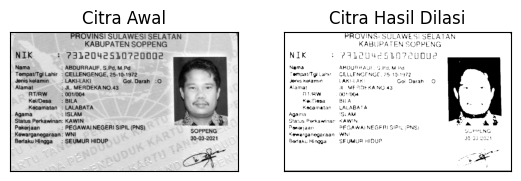

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

# 11. Operasi Dilasi dengan Structuring Element 5x5

In [ ]:
def dilasi_citra(F, w):
  #size image
  p, q = F.shape

  imgD = np.zeros((p, q), dtype=np.uint8)

  # Generate structure element dilasi (SED)
  # SED = np.ones((w, w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype=np.uint8)
  constant1 = (w-1) // 2

  # Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
print('SED = Cross 5')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

SED = Cross 5


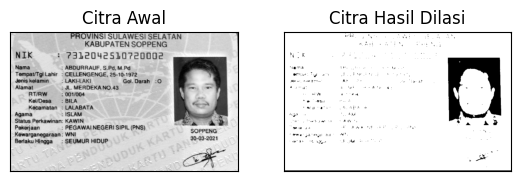

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 12. Operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3

In [ ]:
# Dilasi Circular SED

def dilasi_citra(F, w):
  #size image
  p, q = F.shape

  imgD = np.zeros((p, q), dtype=np.uint8)

  # Generate structure element dilasi (SED)
  SED = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (w, w))
  constant1 = (w-1) // 2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i, j] = np.max(product)

  return imgD

In [ ]:
print('SED = Circle 3')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

SED = Circle 3


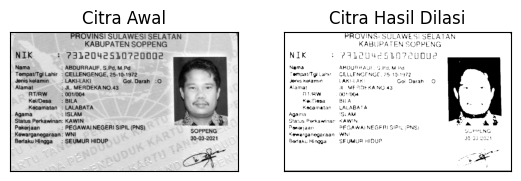

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 13. Operasi dilasi dengan Structuring Element berbentuk 5x5

In [ ]:
print('SED = Circle 5')
img_d = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

SED = Circle 5


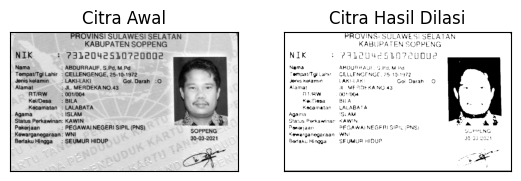

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_d, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

# 14. Operasi Erosi dengan Structuring ELement Berbentuk Rectangle 3x5

In [ ]:
# Erosi Cross SE

def erosi_citra(F, p, l):
  # size image
  m, n = F.shape

  SE = cv2.getStructuringElement(cv2.MORPH_RECT, (p,l)) #SE persegi
  constant1 = (l-1) // 2
  constant2 = (p-1) // 2

  #print (SE)
  imgE = np.zeros((m, n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2, n-constant2):
      temp = F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product = temp * SE
      imgE[i, j] = np.min(product)


  return imgE

In [ ]:
print('SE = Rectangle 3x5')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1, p, l)

SE = Rectangle 3x5


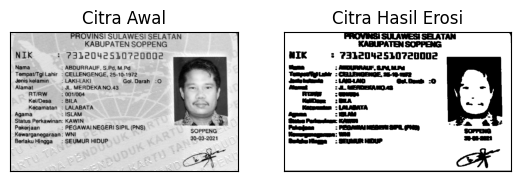

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 15. Operasi Erosi dengan Structuring ELement Berbentuk Rectangle 5x7

In [ ]:
print('SE = Rectangle 5x7')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1, p, l)

SE = Rectangle 5x7


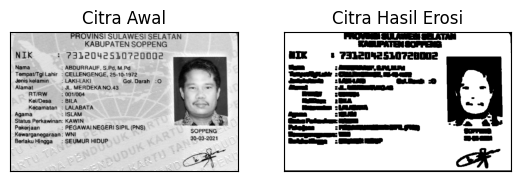

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 16. Operasi Erosi dengan Structuring ELement Berbentuk Line Vertikal 3

In [ ]:
# Erosi Line Vertikal SE

def erosi_citra(F, k):
  #size image
  m, n = F.shape

  # Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, k))
  constant = (k-1) // 2

  imgE = np.zeros((m, n), dtype=np.uint8)

  # Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp * SE
      imgE[i, j] = np.min(product)

  return imgE

In [ ]:
print('SE = Line Vertikal 3')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1, k)

SE = Line Vertikal 3


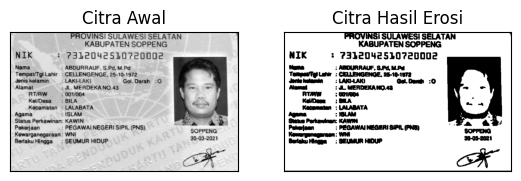

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 17. Operasi Erosi dengan Structuring ELement Berbentuk Line Vertikal 5

In [ ]:
print('SE = Line Vertikal 5')
img_e = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1, k)

SE = Line Vertikal 5


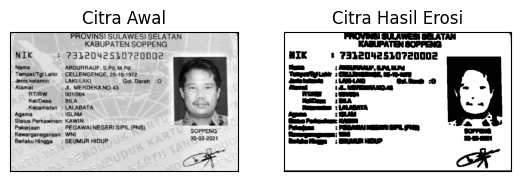

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img_e, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

# 18. TopHat


In [ ]:
# Getting the kernel to be used in Top-Hat
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

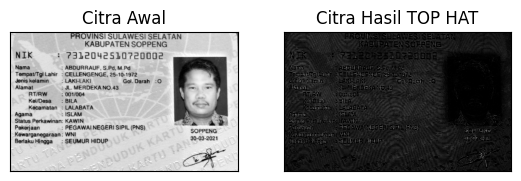

In [ ]:
#cv2_imshow('original', img)
#cv2_imshow('tophat', tophat_img)
#cv2.waitKey(5000)
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(tophat_img, cmap='gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

# 19. BLACKHAT

In [ ]:
filterSize = (3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

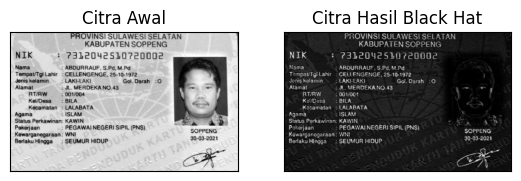

In [ ]:
#cv2_imshow('original', img)
#cv2_imshow('tophat', tophat_img)
#cv2.waitKey(5000)
plt.figure(figsize=(10, 10))
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

# 20. Skeleton

In [ ]:
from skimage import filters
from skimage.morphology import skeletonize

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg', 0)

binary = img > filters.threshold_triangle(img)

binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

skeleton = skeletonize(binary_cp)

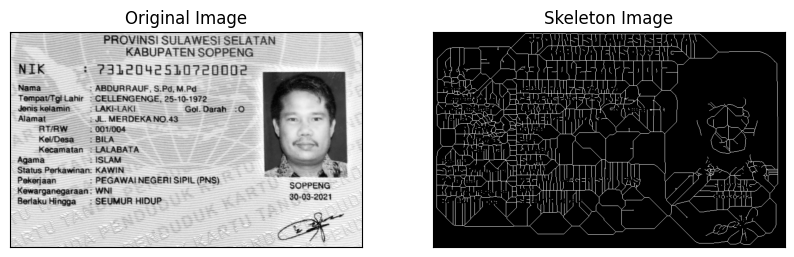

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 21. Skeleton Inverse

In [ ]:
from skimage import io

In [ ]:
img = io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')[..., 0]

binary = img < filters.threshold_triangle(img)

skeleton = skeletonize(binary)

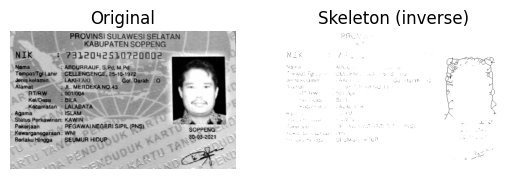

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('Skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

In [ ]:
from skimage import img_as_float, color, morphology

In [ ]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

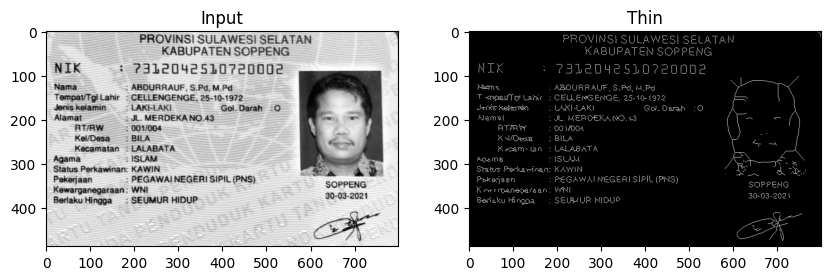

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.show()